In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
import warnings
warnings.filterwarnings("ignore")

**b**

In [2]:
#input dataset
data = pd.read_table("../data/column_2C.dat",sep=" ",header=None, names = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis','cat'])

In [3]:
#map class Normal to 0, class AB to 1
map = {'NO':0,'AB':1}
data.cat.replace(map,inplace=True)

In [4]:
#data display
data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,cat
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


**i**

Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

Text(0.5, 0.98, 'scatter plot of independent variables')

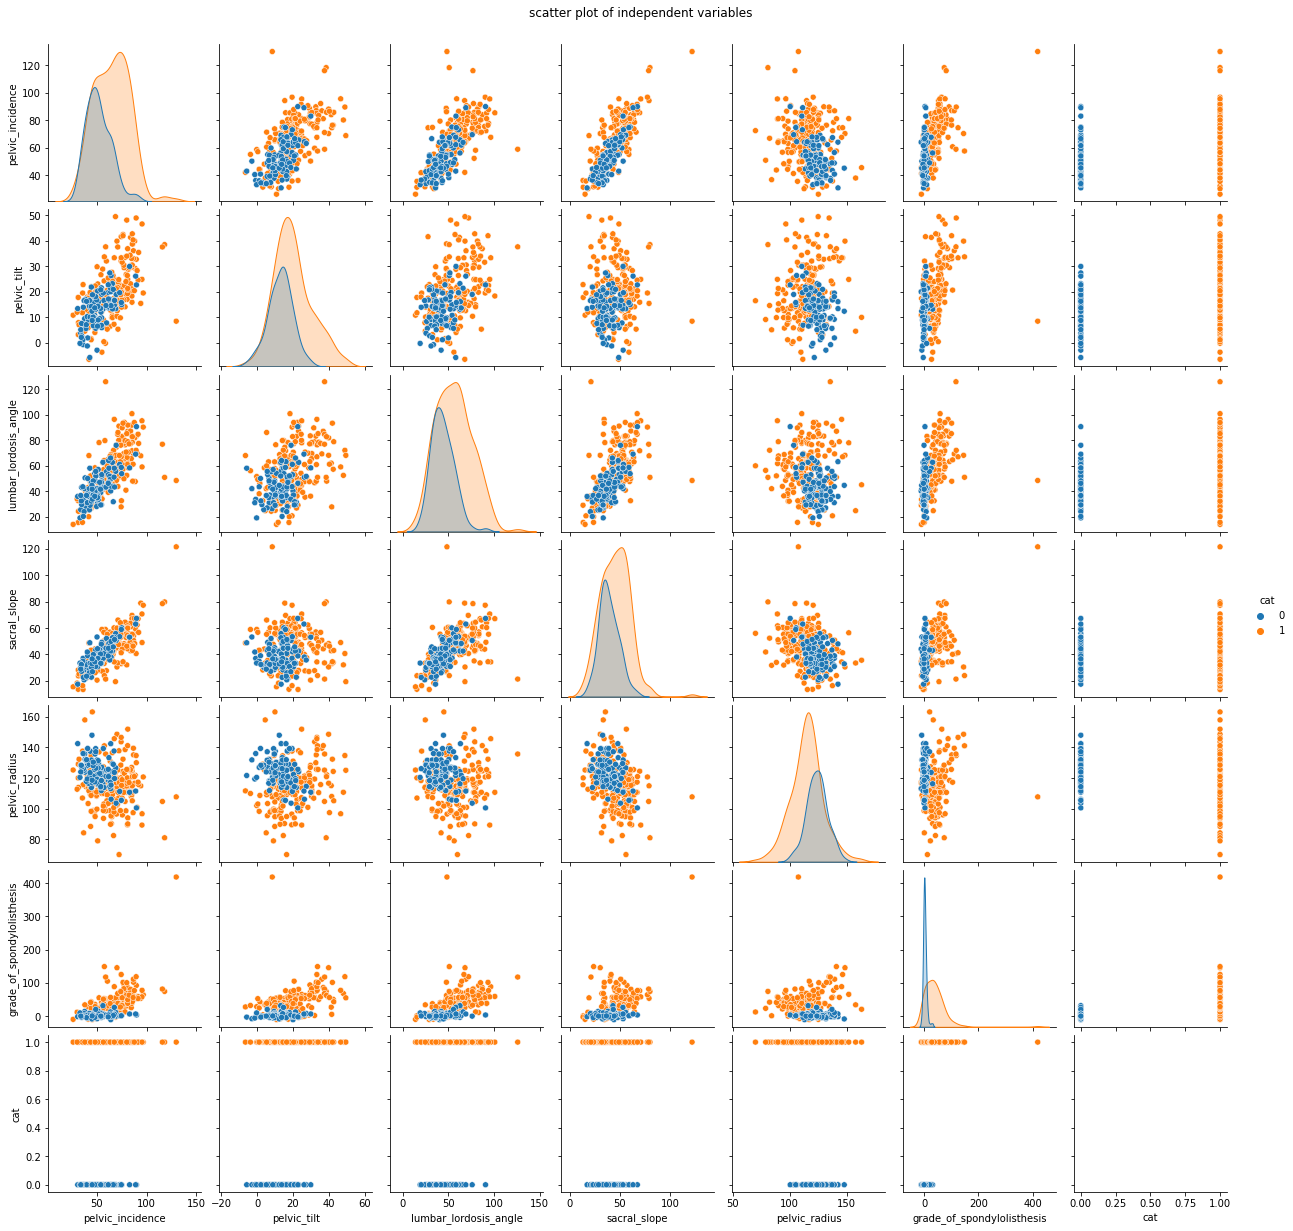

In [5]:
#display independent variables in scatter plot
ax = sns.pairplot(data,vars=data.columns,kind="scatter",hue="cat")
ax.fig.subplots_adjust(top=0.95)
ax.fig.suptitle("scatter plot of independent variables")

**ii.**

 Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

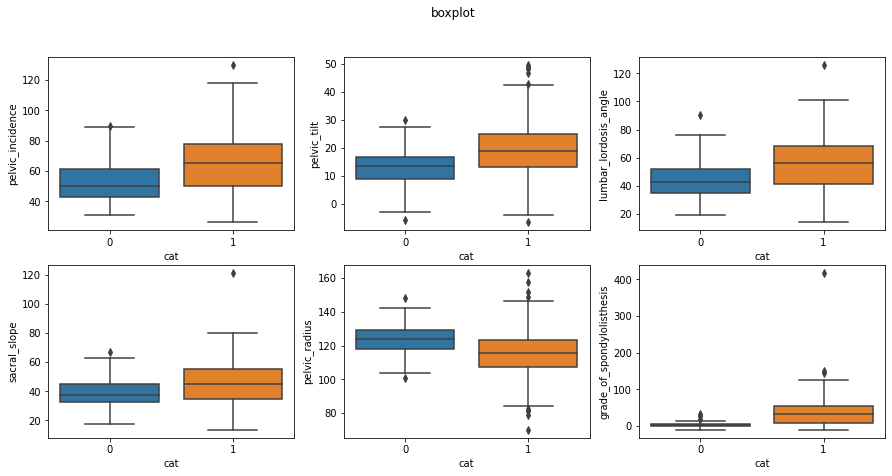

In [6]:
fig = plt.figure(figsize=[15,7])
plt.subplot(2,3,1)
sns.boxplot(data=data,y="pelvic_incidence",x="cat")
plt.subplot(2,3,2)
sns.boxplot(data=data,y="pelvic_tilt",x="cat")
plt.subplot(2,3,3)
sns.boxplot(data=data,y="lumbar_lordosis_angle",x="cat")
plt.subplot(2,3,4)
sns.boxplot(data=data,y="sacral_slope",x="cat")
plt.subplot(2,3,5)
sns.boxplot(data=data,y="pelvic_radius",x="cat")
plt.subplot(2,3,6)
sns.boxplot(data=data,y="grade_of_spondylolisthesis",x="cat")
plt.suptitle('boxplot')
plt.show()

**iii.**

Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [7]:
#create training set
trainingset = data[data['cat']==0][:70]
trainingset = trainingset.append(data[data['cat']==1][:140])

In [8]:
#seperate dependent variable with independent variables
training_y = trainingset.pop('cat')

In [9]:
#create testing set
testingset = data[data['cat']==0][70:]
testingset = testingset.append(data[data['cat']==1][140:])

In [10]:
#seperate dependent variable with independent variables
testing_y = testingset.pop('cat')

**(c)**
Classification using KNN on Vertebral Column Data Set


i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

ii. Test all the data in the test database with k nearest neighbors. Take de- cisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Cal- culate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.2

In [11]:
error = []
f1score = []
tpr = []
tnr = []
for k in range(208,0,-3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(trainingset,training_y)
    train_pred = knn.predict(trainingset)
    test_pred = knn.predict(testingset)
    error.append([k,1-accuracy_score(training_y,train_pred),1-accuracy_score(testing_y,test_pred)])
    f1score.append([k,f1_score(training_y,train_pred),f1_score(testing_y,test_pred)])
    cm_train = confusion_matrix(training_y, train_pred)
    cm_test = confusion_matrix(testing_y, test_pred)
    tpr.append([k,cm_train[1][1]/(cm_train[1][1]+cm_train[1][0]),cm_test[1][1]/(cm_test[1][1]+cm_test[1][0])])
    tnr.append([k,cm_train[0][0]/(cm_train[0][0]+cm_train[0][1]),cm_test[0][0]/(cm_test[0][0]+cm_test[0][1])])
    

In [12]:
#transforming
error = pd.DataFrame(error,columns=['k','train_error',"test_error"])
f1score = pd.DataFrame(f1score,columns=['k','train_f1',"test_f1"])
tpr = pd.DataFrame(tpr,columns=['k','train_tpn','test_tpn'])
tnr = pd.DataFrame(tnr,columns=['k','train_tnr','test_tnr'])
error = error.melt(id_vars="k",value_name="error")
f1score = f1score.melt(id_vars="k",value_name="f1score")
tpr = tpr.melt(id_vars="k",value_name="tpr")
tnr = tnr.melt(id_vars="k",value_name="tnr")

Text(0.5, 1.0, 'training error and testing error with different n_neighbor')

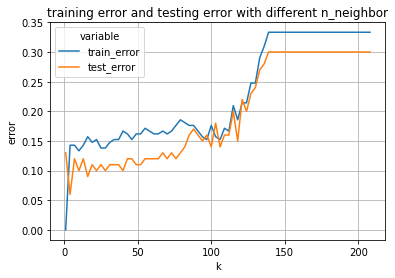

In [13]:
plt.grid()
plt.ylabel('error')
sns.lineplot(data=error,x="k",y = "error",hue = "variable")
plt.title("training error and testing error with different n_neighbor")


**According to the lineplot, 1 will be the most suitable k.**

Text(0.5, 1.0, 'training f1-score and testing f1-score with different n_neighbor')

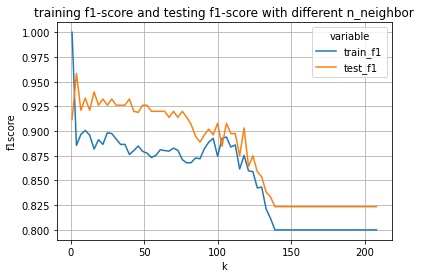

In [14]:
plt.grid()
plt.ylabel('f1score')

#sns.lineplot(data=error,x="k",y="train_error",legend='auto')
sns.lineplot(data=f1score,x="k",y = "f1score",hue = "variable")
plt.title("training f1-score and testing f1-score with different n_neighbor")

Text(0.5, 1.0, 'training tpr and testing tpr with different n_neighbor')

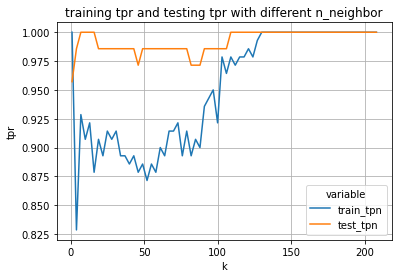

In [15]:
plt.grid()
plt.ylabel('tpr')

#sns.lineplot(data=error,x="k",y="train_error",legend='auto')
sns.lineplot(data=tpr,x="k",y = "tpr",hue = "variable")
plt.title("training tpr and testing tpr with different n_neighbor")

Text(0.5, 1.0, 'training tnr and testing tnr with different n_neighbor')

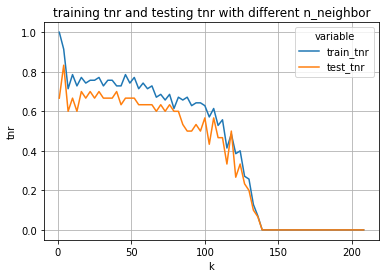

In [16]:
plt.grid()
plt.ylabel('tnr')

#sns.lineplot(data=error,x="k",y="train_error",legend='auto')
sns.lineplot(data=tnr,x="k",y = "tnr",hue = "variable")
plt.title("training tnr and testing tnr with different n_neighbor")

In [17]:

print('true positive value:','\n',tpr[tpr['k']==1])
print('true negative value:','\n',tnr[tnr['k']==1])
print('f1-score:',"\n",f1score[f1score['k']==1])


true positive value: 
      k   variable       tpr
69   1  train_tpn  1.000000
139  1   test_tpn  0.957143
true negative value: 
      k   variable       tnr
69   1  train_tnr  1.000000
139  1   test_tnr  0.666667
f1-score: 
      k  variable   f1score
69   1  train_f1  1.000000
139  1   test_f1  0.911565


In [18]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(trainingset,training_y)
train_pred = knn.predict(trainingset)
test_pred = knn.predict(testingset)
print('train error:',1-accuracy_score(training_y,train_pred),'\n','test error:',1-accuracy_score(testing_y,test_pred))
print('train f1-score:',f1_score(training_y,train_pred),'\n','test f1-score:',round(f1_score(testing_y,test_pred),2))
cm_train = confusion_matrix(training_y, train_pred)
cm_test = confusion_matrix(testing_y, test_pred)
print('training confusion matrix:','\n',cm_train,'\n','testing confusion matrix:','\n',cm_test)
print('training precision:',cm_train[1][1]/(cm_train[1][1]+cm_train[0][1]))
print('testing precision:',cm_test[1][1]/(cm_test[1][1]+cm_test[0][1]))
print('training true positive rate:',cm_train[1][1]/(cm_train[1][1]+cm_train[1][0]))
print('testing true postive rate:',round(cm_test[1][1]/(cm_test[1][1]+cm_test[1][0]),2))
print('training true negative rate:',cm_train[0][0]/(cm_train[0][0]+cm_train[0][1]))
print('testing true negative rate:',round(cm_test[0][0]/(cm_test[0][0]+cm_test[0][1]),2))

train error: 0.0 
 test error: 0.13
train f1-score: 1.0 
 test f1-score: 0.91
training confusion matrix: 
 [[ 70   0]
 [  0 140]] 
 testing confusion matrix: 
 [[20 10]
 [ 3 67]]
training precision: 1.0
testing precision: 0.8701298701298701
training true positive rate: 1.0
testing true postive rate: 0.96
training true negative rate: 1.0
testing true negative rate: 0.67


**iii.**
 
 Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.4 Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.

In [19]:

res = []
for n in range(10,211,10):
    error = []
    n_0= int(np.floor(n/3))
    tmp_train = trainingset[:n_0]
    tmp_train = tmp_train.append(trainingset[70:70+(n-n_0)])
    tmp_trainy = training_y[:n_0]
    tmp_trainy = tmp_trainy.append(training_y[70:70+(n-n_0)])
    for k in range(n,0,-5):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(tmp_train,tmp_trainy)
        train_pred = knn.predict(tmp_train)
        test_pred = knn.predict(testingset)
        error.append([k,1-accuracy_score(tmp_trainy,train_pred)])
    res.append([n]+sorted(error,key = lambda x: x[1])[0])

    

In [20]:
res = pd.DataFrame(res, columns=['n','k','error'])

Text(0.5, 1.0, 'Learning_Curve')

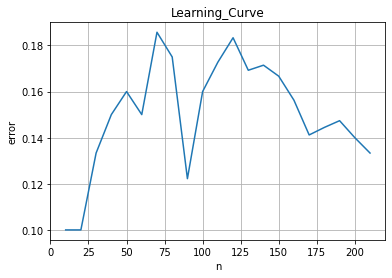

In [21]:
plt.grid()
sns.lineplot(data=res,x="n",y='error')
plt.title('Learning_Curve')

**(d)**

Replace the Euclidean metric with the following metrics5 and test them. Sum- marize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

i. Minkowski Distance:

A. which becomes Manhattan Distance with p = 1.

In [22]:
error = []
for k in range(208,0,-3):
    knn = KNeighborsClassifier(n_neighbors=k,metric='minkowski',metric_params={"p":1})
    knn.fit(trainingset,training_y)
    train_pred = knn.predict(trainingset)
    test_pred = knn.predict(testingset)
    error.append([k,1-accuracy_score(np.array(training_y),train_pred),1-accuracy_score(np.array(testing_y),test_pred)])
bestk = sorted(error,key = lambda x: x[2])

In [23]:
pd.DataFrame(bestk,columns=['k','error_train','error_test'])

,k,error_train,error_test
0,10,0.138095,0.10
1,4,0.133333,0.10
2,28,0.161905,0.11
3,25,0.161905,0.11
4,22,0.157143,0.11
...,...,...,...
65,151,0.333333,0.30
66,148,0.333333,0.30
67,145,0.333333,0.30
68,142,0.333333,0.30


**The best K should be 4.**

B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [24]:
error = []
for logp in np.arange(0.1,1.1,0.1):
    p = np.power(10,logp)
   
    knn = KNeighborsClassifier(n_neighbors=1,metric='minkowski',metric_params={"p":p})
    knn.fit(trainingset,training_y)
    train_pred = knn.predict(trainingset)
    test_pred = knn.predict(testingset)
    error.append([logp,1-accuracy_score(training_y,train_pred),1-accuracy_score(testing_y,test_pred)])

In [25]:
bestk = sorted(error,key = lambda x: x[2],reverse=False)

In [26]:
bestk = pd.DataFrame(bestk,columns=['k','training_error','testing_error'])
bestk

,k,training_error,testing_error
0,0.7,0.0,0.11
1,0.8,0.0,0.11
2,0.9,0.0,0.11
3,1.0,0.0,0.11
4,0.6,0.0,0.12
5,0.1,0.0,0.13
6,0.2,0.0,0.13
7,0.3,0.0,0.13
8,0.4,0.0,0.14
9,0.5,0.0,0.14


**According to training error and testing error, 0.7 will be the best log_10(p).**

C. which becomes Chebyshev Distance with p → ∞

In [27]:
knn = KNeighborsClassifier(n_neighbors=1,metric='chebyshev')
knn.fit(trainingset,training_y)
train_pred = knn.predict(trainingset)
test_pred = knn.predict(testingset)
error = 1-accuracy_score(training_y,train_pred)
error_test = 1-accuracy_score(testing_y,test_pred)

In [28]:
error_test

0.13

ii.Mahalanobis Distance

In [29]:
error = []
for k in range(208,0,-3):
    knn = KNeighborsClassifier(n_neighbors=1,algorithm='brute',metric='mahalanobis',metric_params={'VI':np.cov(np.array(trainingset)).T})
    knn.fit(trainingset,training_y)
    train_pred = knn.predict(trainingset)
    test_pred = knn.predict(testingset)
    error.append([k,1-accuracy_score(np.array(training_y),train_pred),1-accuracy_score(np.array(testing_y),test_pred)])
bestk = sorted(error,key = lambda x: x[1])

In [30]:
bestk = pd.DataFrame(bestk,columns=['k','training_error','testing_error'])
bestk

,k,training_error,testing_error
0,208,0.0,0.29
1,205,0.0,0.29
2,202,0.0,0.29
3,199,0.0,0.29
4,196,0.0,0.29
...,...,...,...
65,13,0.0,0.29
66,10,0.0,0.29
67,7,0.0,0.29
68,4,0.0,0.29


**All model with different K parameter have the same performance.**

**(e)**

The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.


In [31]:
error = []
dis = ['euclidean','manhattan','chebyshev']
for d in dis:
    for k in range(1,197,5):
            knn = KNeighborsClassifier(n_neighbors=k,metric=d,weights='distance')
            knn.fit(trainingset,training_y)
            train_pred = knn.predict(trainingset)
            test_pred = knn.predict(testingset)
            error.append([d,k,1-accuracy_score(training_y,train_pred),1-accuracy_score(testing_y,test_pred)])
        

In [32]:
error = pd.DataFrame(error,columns=['distance','k','train_error','test_error'])

In [33]:
error.groupby(['k']).min('test_error')

,train_error,test_error
k,,
1,0.0,0.12
6,0.0,0.10
11,0.0,0.11
16,0.0,0.11
21,0.0,0.11
26,0.0,0.10
31,0.0,0.11
36,0.0,0.11
41,0.0,0.11


In [34]:
error.sort_values(by='test_error',ascending=True)

,distance,k,train_error,test_error
1,euclidean,6,0.0,0.10
45,manhattan,26,0.0,0.10
48,manhattan,41,0.0,0.11
86,chebyshev,31,0.0,0.11
87,chebyshev,36,0.0,0.11
...,...,...,...,...
38,euclidean,191,0.0,0.28
78,manhattan,191,0.0,0.28
39,euclidean,196,0.0,0.28
119,chebyshev,196,0.0,0.28


**The best test error is euclidean distance with k = 6**

**(f)**

What is the lowest training error rate you achieved in this homework?

**The lowest training error rate is 0 by Knn model with euclidean distance and k = 1.**